# Übung III: Differentialgleichungen

Differentialgleichungen sind insbesondere wichtig für die Beschreibung von Bewegungen, z.B. die Vorhersage der Umlaufbahn von Planeten oder die Berechnung der Diffusionsgeschwindigkeit von Molekülen. Auch die berühmte Schrödinger-Gleichung in der Quantenmechanik besitzt die Form einer partiellen Differentialgleichung zweiter Ordnung. In dieser Übung werden wir die Python-Funktionen zur Lösung einfacher Differentialgleichungen kennenlernen und Bewegungen durch Aminationen in Python anzeigen. 

In den letzten Übungen haben wir **sympy** wiederholt verwendet, um analytische Ergebnisse zu erhalten. Es lässt sich auch zum Lösen von Differentialgleichungen verwenden. 

Wir nehmen als Beispiel die gewöhnliche Differentialgleichung (**ODE**, **O**rdinary **D**ifferential **E**quation) $y^{\prime} = x$. 

In [2]:
import sympy as sp
x = sp.symbols('x')
y = sp.Function('y')

$y$ ist in diesem Fall eine Funktion von x und wird dementsprechend mit **Function** definiert. 

Statt der Form $y^{\prime} = x$ ist der Ausdruck $y^{\prime} - x = 0$ geeigneter für die Programmierung. Standardmäßig ist die rechte Seite null und die linke Seite die zulösende Differentialgleichung. Als Code wird der Ausdruck wie folgt notiert: 

In [2]:
eq1 = y(x).diff(x) - x

Die Lösung erfolgt einfach mit **dsolve**: 

In [3]:
sp.dsolve( eq1 , y(x) )

Eq(y(x), C1 + x**2/2)

Lösen Sie Aufgabe 5 aus Übungszettel 9. 

<img src="pictures/Aufgabe9.5.png" width=720 height=240>

In [4]:
# Aufgabe 9.5 *
c = sp.Function('c')
k1, k2, c0, t = sp.symbols('k1, k2, c0, t')
eq = c(t).diff(t) - k1 * c(t) - k2 * ( c0 - c(t) )
sol = sp.dsolve(eq, c(t))
sp.pprint(sol)

                 -C₁⋅k₁ - k₂⋅t  C₁⋅k₂ + k₁⋅t
       -c₀⋅k₂ + ℯ             ⋅ℯ            
c(t) = ─────────────────────────────────────
                      k₁ - k₂               


Wir können auch die Anfangsbedingung ( z.B. $y(0) = 1$ ) mit '**ics**' einführen, sodass die Intergrationskonstante $C_1$ in dem vorherigen Beispiel bestimmt werden kann. 

In [5]:
sp.dsolve( eq1, y(x), ics={y(0):1} )

Eq(y(x), x**2/2 + 1)

Lösen Sie Aufgabe 2a) aus Übungszettel 10. 

<img src="pictures/Aufgabe10.2a.png" width=300 height=100>

In [4]:
# Aufgabe 10.2a *
eq = x * y(x).diff(x) - 2 * y(x) - 1 / x 
sp.dsolve(eq,y(x), ics={y(1):1})

Eq(y(x), 4*x**2/3 - 1/(3*x))

Wir behandeln im folgenden ein Beispiel des freien Falls. Die entsprechende Differentialgleichung ist $ h^{\prime\prime}(t) = -g$, wobei $h$ die Höhe und $g = 9.8\,m \cdot s^{-2}$ die Erdebeschleunigung ist. Der Anfangspunkt des Falls hat eine Höhe von $h_0 = 1000\,m$ und die Anfangsgeschwindigkeit ist $v_0 = - 10\,m \cdot s^{-1}$ (d.h. nach unten). 

In [8]:
# Funktion für den freien Fall
t = sp.symbols('t')
h = sp.Function('h')
eq2 = h(t).diff(t,2) + 9.8
sol2 = sp.dsolve( eq2, h(t) )
sp.pprint (sol2)

                       2
                   49⋅t 
h(t) = C₁ + C₂⋅t - ─────
                     10 


Jetzt setzen wir die Anfangsbedingungen ein. Die Anfangsbedingung für die Geschwindigkeit lässt sich als die erste Ableitung von $h(t)$ ( **h(t).diff(t)** ) am Zeitpunkt $t = 0$ ( **subs(t,0)** ) ausdrücken

In [9]:
sol2new = sp.dsolve( eq2, h(t), ics = { h(0):1000, h(t).diff(t).subs(t,0):-10 } )
sp.pprint (sol2new)

             2              
         49⋅t               
h(t) = - ───── - 10⋅t + 1000
           10               


Die Höhe des fallenden Körpers zu jedem Zeitpunkt (z.B $t = 5\,s$) ist ermittelbar.  

In [10]:
sp.pprint (sol2new.subs(t,5))

h(5) = 1655/2


Lösen Sie Aufgabe 1d) aus Übungszettel 12. 

<img src="pictures/Aufgabe12.1d.png" width=900 height=300>

In [11]:
# Aufgabe 12.1d * 
eq = y(x).diff(x,3) + 3 * y(x).diff(x,2) + 3 * y(x).diff(x) + y(x)
sp.dsolve(eq, y(x), ics = { y(0):1, y(x).diff(x).subs(x,0):1, y(x).diff(x,2).subs(x,0):1 } )

Eq(y(x), (x*(2*x + 2) + 1)*exp(-x))

#### Einschub I. 
----
Lösen Sie die zeitunabhängige Schrödinger-Gleichung: $ - \frac{ \hbar^2 }{ 2m } \frac{\partial^2}{\partial\,x^2} \Psi + V \cdot \Psi = E \cdot \Psi  $. Die partielle Ableitung hier kann einfach als die normale Ableitung behandelt werden. Angenommen wird hier auch, dass für $V$ keine Ortsabhängigkeit (Abhängigkeit von x) besteht. 

In [12]:
# zeitunabhängige Schrödinger-Gleichung *
x, E, h, m, V = sp.symbols('x, E, ℏ, m, V')
p = sp.Function('𝜓')
sg = ( E - V ) * p(x) + ( h**2 / (2 * m) ) * p(x).diff(x,2)
sol3 = sp.dsolve(sg, p(x))
sp.pprint(sol)

                 -C₁⋅k₁ - k₂⋅t  C₁⋅k₂ + k₁⋅t
       -c₀⋅k₂ + ℯ             ⋅ℯ            
c(t) = ─────────────────────────────────────
                      k₁ - k₂               


----
Es ist jedoch nicht immer möglich, eine analytische Lösung via Programmierung zu finden, z.B. für die sehr einfache ODE $y^\prime = \cos(x)$. 

In [13]:
import numpy as np
#eq = y(x).diff(x) - np.cos(x)

Diese Gleichung kann nicht aufgestellt werden. Dies gilt für alle trigonometrischen und logarithmischen bzw. exponentiellen Funktionen. Für praktische Anwendungen reicht es manchmal auch, eine numerische Lösung zu erhalten. Dafür steht die Funktion **odeint** aus dem **scipy** Paket zur Verfügung. Wir nehmen als Beispiel die ODE $y^\prime = \cos(x)$ und stellen eine Funktion auf, um diese ODE zu beschreiben. Der Term nach dem **return** am Ende der Funktion ist gleich $\frac{\text{d}y}{\text{d}x}$. 

In [14]:
import numpy as np
def diff1(y, x):
    return np.cos(x)

Die Funktion **odeint** nimmt drei Argumente auf: Die ODE, die Anfangsbedingung und die unabhängige Variable, wobei die unabhängige Variable als Liste gegeben wird. 

In [15]:
from scipy.integrate import odeint
x = [ 0, 1/2 * np.pi, np.pi, 3/2 * np.pi, 2 * np.pi ]
y = odeint(diff1, 0, x)
print (y)

[[ 0.00000000e+00]
 [ 1.00000005e+00]
 [ 1.65145713e-07]
 [-9.99999843e-01]
 [ 1.65885211e-07]]


Für die Übersichtlichkeit können wir die Zahlen in einer Liste mit **np.round** aufrunden. 

In [16]:
print ( np.round(y, decimals=2) )

[[ 0.]
 [ 1.]
 [ 0.]
 [-1.]
 [ 0.]]


Um eine Menge von Eingaben zu erhalten, ohne jeden Wert von $x$ einzutippen, können wir **np.linspace** verwenden. 

In [17]:
print ( np.linspace(1,10,10) )

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Das erste und zweite Argument sind jeweils der Anfangs- und Endwert. Das dritte gibt die Gesamtzahl an Werten. Wir setzen als Eingabe für die ODE 100 Werte zwischen $0$ und $2\pi$ ein und tragen $y$ gegen $x$ auf. 

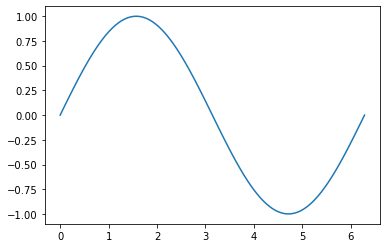

In [18]:
x = np.linspace(0, 2*np.pi, 100)
y = odeint(diff1, 0, x)
import matplotlib.pyplot as plt
plt.plot(x,y);

Wir lösen jetzt das vorherige freie Fall Beispiel nummerisch mit **odeint**. Die Differentialgleichung zweiter Ordnung $ h^{\prime\prime}(t) = -g$ können wir durch zwei Differentialgleichungen erster Ordnung $ v^{\prime}(t) = -g$ und $ h^{\prime}(t) = v$ ausdrücken. 

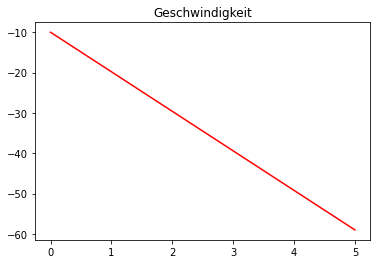

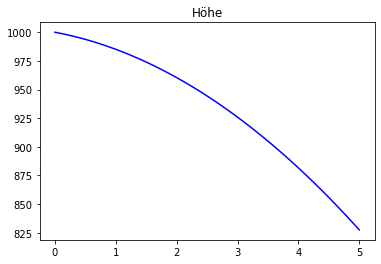

In [19]:
# Freier Fall mit odeint
g = 9.8
def diff2(list, t):
    v, h = list
    return -g, v

t = np.linspace(0, 5, 50)
sol4 = odeint(diff2, [-10, 1000], t)

plt.figure()
plt.plot(t, sol4[:, 0],'r')
plt.title('Geschwindigkeit');
plt.figure()
plt.plot(t, sol4[:, 1],'b')
plt.title('Höhe');

Aus den Werten der Höhe zu jdem Zeitpunkt können wir eine Animation mit **matplotlib.animation** aufstellen, um den Prozess zu visualisieren. Zusätzlich brauchen wir noch **HTML** aus dem **IPython**-Paket, um diese Animation interaktiv zu zeigen. 

In [20]:
import matplotlib.animation as anime
from IPython.display import HTML

Wir stellen erstens eine Graphik auf und fügen den Namen 'f' hinzu, um die Animation später anzuzeigen. Der frei fallende Körper (hier ein Punkt) muss auch aufgetragen und mit einem Name ausgestattet werden. Die $x$-Koordinate des Punkts ist $1$ und bleibt unverändert. **xlim** und **ylim** stellt die Grenze der beiden Achsen ein. 

(750.0, 1050.0)

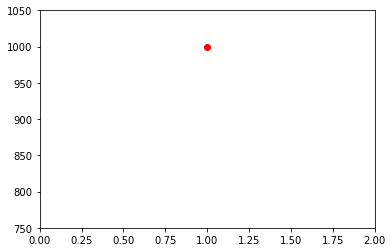

In [21]:
f = plt.figure()
point, = plt.plot(1,1000,'ro')
plt.xlim((0,2))
plt.ylim((750,1050))

Jetzt schreiben wir eine Funktion, die die Höhe des Punkts bei jedem Zeitpunkt $t$ mittels des Befehls **set_data()** aktualisiert. Die zwei Eingaben in den Klammern von **set_data()** sind die $x$- und $y$-Koordinate. $h$ ist die Lösung der Differentialgleichung für die Höhe. $h(t)$ ist damit die Höhe am Zeitpunkt $t$. 

In [22]:
h = sol4[:, 1]
def fall(t):
    point.set_data(1,h[t])

Jetzt sind wir vorbereitet und können die Animation mit **FuncAnimation** aufstellen. Wir haben die Höhe von 50 Zeitpunkten und die Anzahl von Bildern ( **frame**) ist damit 50. **interval** gibt die Zeitdauer zwischen zwei Bildern in Minisekunden an. Für das menschliche Auge ist normalerweise eine Bildrate von 24 pro Sekunde (eine Zeitdauer von ungefähr $42\,ms$ zwischen zwei Bildern) erforderlich, sodass die Animation kontinuierlich und flüssig aussieht. 

Der Befehl **HTML** zeigt die Animation in einer interaktiven Weise an. Klicken Sie auf die verschiedenen Tasten und entdecken Sie deren Funktionen. 

In [23]:
ani = anime.FuncAnimation(f, fall, frames=50, interval=42)
HTML(ani.to_jshtml())

Wir fassen nun die nötigen Codes für die Animation zusammen. Im folgenden werden wir diesen Code-Block wieder verwenden. 

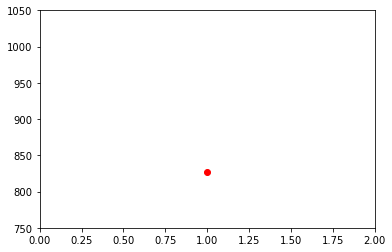

In [66]:
f = plt.figure()
point, = plt.plot(1,1000,'ro')
plt.xlim((0,2))
plt.ylim((750,1050))

h = sol4[:, 1]

def fall(t):
    point.set_data(1,h[t])
    
ani = anime.FuncAnimation(f, fall, frames=50, interval=42)
HTML(ani.to_jshtml())

Wir können weiter einen Indikator hinzufügen, der die Bewegung des Punkts begleitet und die aktuelle Höhe des Punkts anzeigt. Dafür nehmen wir **plt.text** und aktualisieren deren Position und Inhalt in der Funktion **fall** durch **set_text** und **set_position**. 

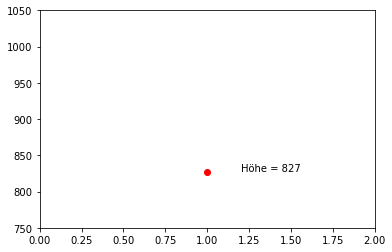

In [25]:
f = plt.figure()
point, = plt.plot(1,1000,'ro')
indicator = plt.text(1.2,1000,'Höhe')
plt.xlim((0,2))
plt.ylim((750,1050))

h = sol4[:, 1]

def fall(t):
    point.set_data(1,h[t])
    indicator.set_text('Höhe = ' + "%d"%h[t])
    indicator.set_position((1.2,h[t]))
    
ani = anime.FuncAnimation(f, fall, frames=50, interval=42)
HTML(ani.to_jshtml())

Für die Funktion, die die Koordinaten des Objekts aktualisiert, ist die Vorbereitung einer Liste von Koordinaten an jedem Zeitpunkt nicht notwendig, wenn wir eine analytische Lösung der Bewegung kennen. Wir zeigen als Beispiel die [symmetrische Streckschwingung](https://de.wikipedia.org/wiki/Molek%C3%BClschwingung#Schwingungsformen_und_Bezeichnungen) eines $CO_2$-Moleküls. Dies lässt sich durch eine Sinusfunktion beschreiben. 

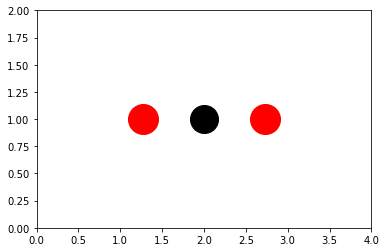

In [68]:
f = plt.figure()
plt.plot(2, 1, color='black',marker='o', markersize=28) # Das C-Atom
O1, = plt.plot([], [], 'ro', markersize=30) # Das erste O-Atom
O2, = plt.plot([], [], 'ro', markersize=30) # Das zweite O-Atom

plt.xlim((0,4))
plt.ylim((0,2))

def vib(t):
    x_O1 = 1 - 0.3 * np.sin(t)
    x_O2 = 3 + 0.3 * np.sin(t)
    O1.set_data(x_O1, 1)
    O2.set_data(x_O2, 1)
    
ani = anime.FuncAnimation(f, vib, frames=25, interval=100)
HTML(ani.to_jshtml())

Wir sehen, dass die Koordinaten der beiden Sauerstoffatome nur von der gegebenen Funktion abhängig ist. Eine Eingabe außerhalb der Funktion spielt keine Rolle für die Koordinaten und kann sogar leer ( gegeben durch '\[ \]' ) sein. 

Die [antisymmetrische Streckschwingung](https://de.wikipedia.org/wiki/Molek%C3%BClschwingung#Schwingungsformen_und_Bezeichnungen) unterscheidet sich ausschließlich um ein Vorzeichen. Beobachten Sie die symmetrische und antisymmetrische Streckschwingungen auf der Wiki-Webseite und finden Sie deren Unterschied. Schreiben Sie dann die Funktion dafür (Die Codes unterscheiden sich auch nur um ein Vorzeichen). 

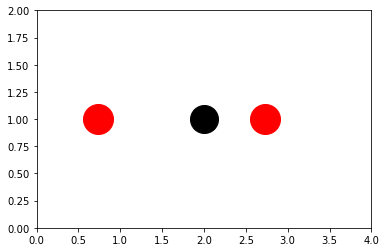

In [67]:
# Antisymmetrische Streckschwingung * 
f = plt.figure()
plt.plot(2, 1, color='black',marker='o', markersize=28) # Das C-Atom
O1, = plt.plot([], [], 'ro', markersize=30) # Das erste O-Atom
O2, = plt.plot([], [], 'ro', markersize=30) # Das zweite O-Atom

plt.xlim((0,4))
plt.ylim((0,2))

def vib(t):
    x_O1 = 1 + 0.3 * np.sin(t)
    x_O2 = 3 + 0.3 * np.sin(t)
    O1.set_data(x_O1, 1)
    O2.set_data(x_O2, 1)
    
ani = anime.FuncAnimation(f, vib, frames=25, interval=100)
HTML(ani.to_jshtml())

Wir können noch die Bindungen hinzufügen, deren Länge sich gleich wie die Position der Sauerstoffatome verändern. Die Option **zorder=0** stellt die Bindungen auf den Boden der Graphik, sodass die Atome nicht verdeckt werden. 

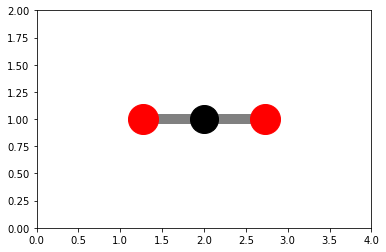

In [64]:
f = plt.figure()
plt.plot(2, 1, color='black',marker='o', markersize=28) # Das C-Atom
O1, = plt.plot([], [], 'ro', markersize=30) # Das erste O-Atom
O2, = plt.plot([], [], 'ro', markersize=30) # Das zweite O-Atom
bond_CO1, = plt.plot([],[],'gray',linewidth = 10, zorder = 0)
bond_CO2, = plt.plot([],[],'gray',linewidth = 10, zorder = 0)

plt.xlim((0,4))
plt.ylim((0,2))

def vib(t):
    x_O1 = 1 - 0.3 * np.sin(t)
    x_O2 = 3 + 0.3 * np.sin(t)
    O1.set_data(x_O1, 1)
    O2.set_data(x_O2, 1)
    bond_CO1.set_data([2,x_O1],[1,1])
    bond_CO2.set_data([2,x_O2],[1,1])
    
ani = anime.FuncAnimation(f, vib, frames=25, interval=100)
HTML(ani.to_jshtml())

#### Einschub II. 
----

Erzeugen Sie eine Animation für den Kreislauf der Erde um die Sonne, wobei der Mond auch um die Erde kreist. Die beiden Umlaufbahnen können als kreisförmig betrachtet werden. 

**Hinweise**: 
1. Die Umlauffrequenz des Monds ist 12-mal so schnell wie die der Erde. 
2. Die $x$- und $y$-Koordinaten der Erde sind jeweils $L \cdot \cos(\omega t)$ und $L \cdot \sin(\omega t)$, wobei $L$ die Distanz zwischen der Sonne und der Erde und $\omega$ die Frequenz des Kreislaufs ist. Die $x$- und $y$-Koordinaten des Monds lässt sich auch in einer ähnlichen Weise formulieren. Wählen Sie $L$ und $\omega$ für die Erde und den Mond vernünftig aus, sie aber müssen nicht absolut realistisch sein. Aber die relative Beziehung können in gewissem Maß erhalten sein. Das gilt besonders für die Frequenz. 

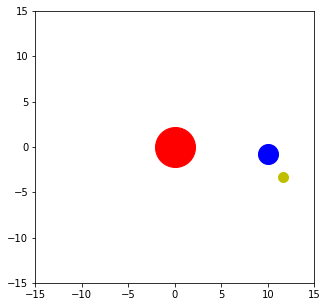

In [88]:
# Die Umlaufbewegung der Erde und des Monds * 
f = plt.figure(figsize=(5,5))
size = 15
plt.xlim((-size,size))
plt.ylim((-size,size))

plt.plot(0, 0, color='r',marker='o', markersize=40) # Die Sonne
earth, = plt.plot([], [], 'bo', markersize=20) # Die Erde
moon, = plt.plot([], [], 'yo', markersize=10) # Der Mond

def circle(t):
    scale = 20
    x1 = 10 * np.cos(t / scale)
    y1 = 10 * np.sin(t / scale)
    x2 = x1 + 3 * np.cos(t / scale * 12)
    y2 = y1 + 3 * np.sin(t / scale * 12)
    earth.set_data(x1, y1)
    moon.set_data(x2, y2)
    
ani = anime.FuncAnimation(f, circle, frames=125, interval=100)
HTML(ani.to_jshtml())